# Câu 1. Giảm chiều dữ liệu

In [1]:
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns

from sklearn.decomposition import PCA


In [2]:
data1 = pd.read_csv("Breast Cancer.csv")

## ('1.1) Vẽ biểu đồ phân tích phương sai tích lũy của PCA     ***')

1.1) Vẽ biểu đồ phân tích phương sai tích lũy của PCA     ***


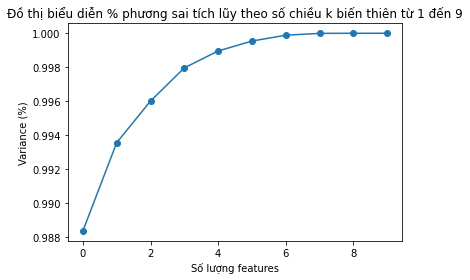

Phân tích chi tiết theo k: 

   * Với k =  1 --> phương sai tích lũy 98.83%
      - Ma trận trị riêng LAMBDA (1,)
      - Chuyển vị của ma trận vectơ riêng P_T (1, 10) : 

   * Với k =  2 --> phương sai tích lũy 99.35%
      - Ma trận trị riêng LAMBDA (2,)
      - Chuyển vị của ma trận vectơ riêng P_T (2, 10) : 

   * Với k =  3 --> phương sai tích lũy 99.60%
      - Ma trận trị riêng LAMBDA (3,)
      - Chuyển vị của ma trận vectơ riêng P_T (3, 10) : 

   * Với k =  4 --> phương sai tích lũy 99.80%
      - Ma trận trị riêng LAMBDA (4,)
      - Chuyển vị của ma trận vectơ riêng P_T (4, 10) : 

   * Với k =  5 --> phương sai tích lũy 99.90%
      - Ma trận trị riêng LAMBDA (5,)
      - Chuyển vị của ma trận vectơ riêng P_T (5, 10) : 

   * Với k =  6 --> phương sai tích lũy 99.95%
      - Ma trận trị riêng LAMBDA (6,)
      - Chuyển vị của ma trận vectơ riêng P_T (6, 10) : 

   * Với k =  7 --> phương sai tích lũy 99.99%
      - Ma trận trị riêng LAMBDA (7,)
      - Chuyển vị của ma trậ

In [8]:
print('1.1) Vẽ biểu đồ phân tích phương sai tích lũy của PCA     ***')
print('=============================================================')

pca = PCA().fit(data1)

# Vẽ đồ thị biểu diễn % phương sai tích lũy theo số chiều k biến thiên từ 1 đến 9
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Số lượng features')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số chiều k biến thiên từ 1 đến 9')
plt.show()


print('Phân tích chi tiết theo k: \n')
for k in range(1, 10):
    pca = PCA(k)
    pca.fit(data1)
      
    var = pca.explained_variance_ratio_.sum() * 100
    print('   * Với k = %2d' %k, '--> phương sai tích lũy %.2f%%' %var)

    # Test - BEGIN
    print('      - Ma trận trị riêng LAMBDA', pca.explained_variance_.shape)   
    print('      - Chuyển vị của ma trận vectơ riêng P_T', pca.components_.shape, ': \n')
    # Test - END



# 1.2) Chọn k dựa trên đồ thị biểu diễn phương sai tích lũy


# Nhận xét:

  k >=  3: giữ lại ~ 99.6%  phương sai so với dữ liệu gốc

## 1.3) Trực quan hóa dữ liệu với số chiều k = 2. Nhận xét kết quả phân lớp

1.3) Giảm chiều còn k = 2 và trực quan hóa dữ liệu      ***
- Ma trận B_T          PC 1       PC 2
0 -118.146799 -33.747671
1  -66.126070 -10.358435
2   19.768147  -7.549560
3  393.026588 -31.560122
4  239.018536 -15.048337 



<Figure size 576x432 with 0 Axes>

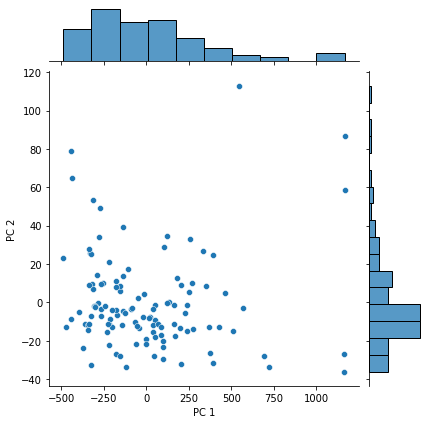

         PC 1       PC 2  Classification
0 -118.146799 -33.747671               1
1  -66.126070 -10.358435               1
2   19.768147  -7.549560               1
3  393.026588 -31.560122               1
4  239.018536 -15.048337               1 



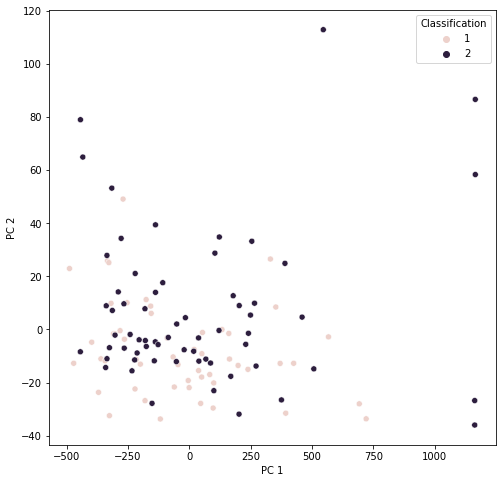

In [18]:
print('1.3) Giảm chiều còn k = 2 và trực quan hóa dữ liệu      ***')
print('=============================================================')
k   = 2
pca = PCA(k)
pca.fit(data1)

# transform data
B = pca.transform(data1)
principalDf = pd.DataFrame(data = B, columns = ['PC 1', 'PC 2'])
print('- Ma trận B_T', principalDf.head(), '\n')


# Trực quan hóa dữ liệu (KHÔNG phân loại)
plt.figure(figsize = (8, 6))
sns.jointplot(x = 'PC 1', y = 'PC 2', data = principalDf)              
plt.show()

# Lấy cột phân loại (Classification) trong file dữ liệu
y = np.array(data1.Classification)
y = pd.DataFrame(data = y, columns = ['Classification'])

# Ghép cột phân loại (Classification) vào ma trận PCA
finalDf = pd.concat([principalDf, y], axis = 1)
print(finalDf.head(), '\n')

# Trực quan hóa dữ liệu (CÓ phân loại)
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'PC 1', y = 'PC 2', data = finalDf, hue = 'Classification', legend = 'full')              
plt.show()


# Nhận xét: 
Sau khi trực quan hoá dữ liệu với k = 2,
Tại vị trí (0,0): nhóm 1 và 2 có độ phân bố tương tự nhau, 
Tuy nhiên, nhóm 2 có tính phân bố bất ổn định hơn nhóm 1 khi xa vị trí (0,0)